In [1]:
# Load the libraries
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams

%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 30, 20

In [3]:
# Define the filename that we will be using
filename = 'testerfile.py'

In [4]:
with open(filename) as f:
    content = f.readlines()

In [5]:
values = []

In [6]:
for line in content:
    if("from" in line or "import" in line):
        line = line.replace('\n', '')
        if(',' in line and 'import' in line and 'from' not in line):
            line = line.replace(',', ' ')
            temp = line.split(" ")
            temp2 = temp[1:]
            for i in temp2:
                i = i.lstrip().rstrip()
                if(i != ''):
                    values.append(str(temp[0]) + " " + str(i))
                
        elif(',' in line and 'import' in line and 'from' in line):
            temp = line.split(' import ')
            temp2 = ''.join(temp[1:]).split(',')
            for i in temp2:
                values.append(str(temp[0]) + " import " + str(i.lstrip().rstrip()))
        else:
            values.append(line)

In [7]:
values

['import sys',
 'from typing import List',
 'from numpy import linspace',
 'from numpy import diagonal',
 'from pandas import dataframe',
 'from pandas import series',
 'import tensorflow',
 'import pytorch',
 'import keras',
 'from loguru import logger',
 'from typing_extensions import Literal',
 'from tiktok_bot.api import TikTokAPI',
 'from tiktok_bot.models.category import Category',
 'from tiktok_bot.models.category import ListCategoriesRequest',
 'from tiktok_bot.models.feed import ListFeedRequest',
 'from tiktok_bot.models.feed_enums import FeedType',
 'from tiktok_bot.models.feed_enums import PullType',
 'from tiktok_bot.models.post import Post',
 'from tiktok_bot.models.search import ChallengeInfo',
 'from tiktok_bot.models.user import CommonUserDetails',
 'from tiktok_bot.models.user import UserProfile']

In [8]:
def get_module_name(line):
    """Function takes a line and returns the name of module
    Parameters:
    line: str
    return: string
    """
    if("import" in line and "as" not in line and "from" not in line):
        return line.split()[1].lstrip().rstrip()
    elif("import" in line and "as" in line and "from" not in line):
        return line.split()[1].lstrip().rstrip()
    elif('from' in line and 'import'):
        temp = line.split()
        return str(temp[1].lstrip().rstrip()) + "." + str(temp[3].lstrip().rstrip())
    else:
        return "You dummy"

In [9]:
values_san = []

for i in values:
    values_san.append(get_module_name(i))
    print(get_module_name(i))

sys
typing.List
numpy.linspace
numpy.diagonal
pandas.dataframe
pandas.series
tensorflow
pytorch
keras
loguru.logger
typing_extensions.Literal
tiktok_bot.api.TikTokAPI
tiktok_bot.models.category.Category
tiktok_bot.models.category.ListCategoriesRequest
tiktok_bot.models.feed.ListFeedRequest
tiktok_bot.models.feed_enums.FeedType
tiktok_bot.models.feed_enums.PullType
tiktok_bot.models.post.Post
tiktok_bot.models.search.ChallengeInfo
tiktok_bot.models.user.CommonUserDetails
tiktok_bot.models.user.UserProfile


My idea is to first make it work for one file and then move into an entire zip file

In [10]:
G = nx.Graph()

In [11]:
# add the head node which is the filename
G.add_node(filename)

In [12]:
# Eventually make a  list where I could have all the 
default_moduels = []

In [13]:
for i in values_san:
    if('.' not in i):
        G.add_edge(filename, i)
    else:
        temp = i.split('.')
        G.add_edge(filename, temp[0])
        j = 0
        while(j < len(temp)-1):
            G.add_edge(temp[j], temp[j+1])
            j += 1

/home/data/anaconda3/envs/DataSci/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


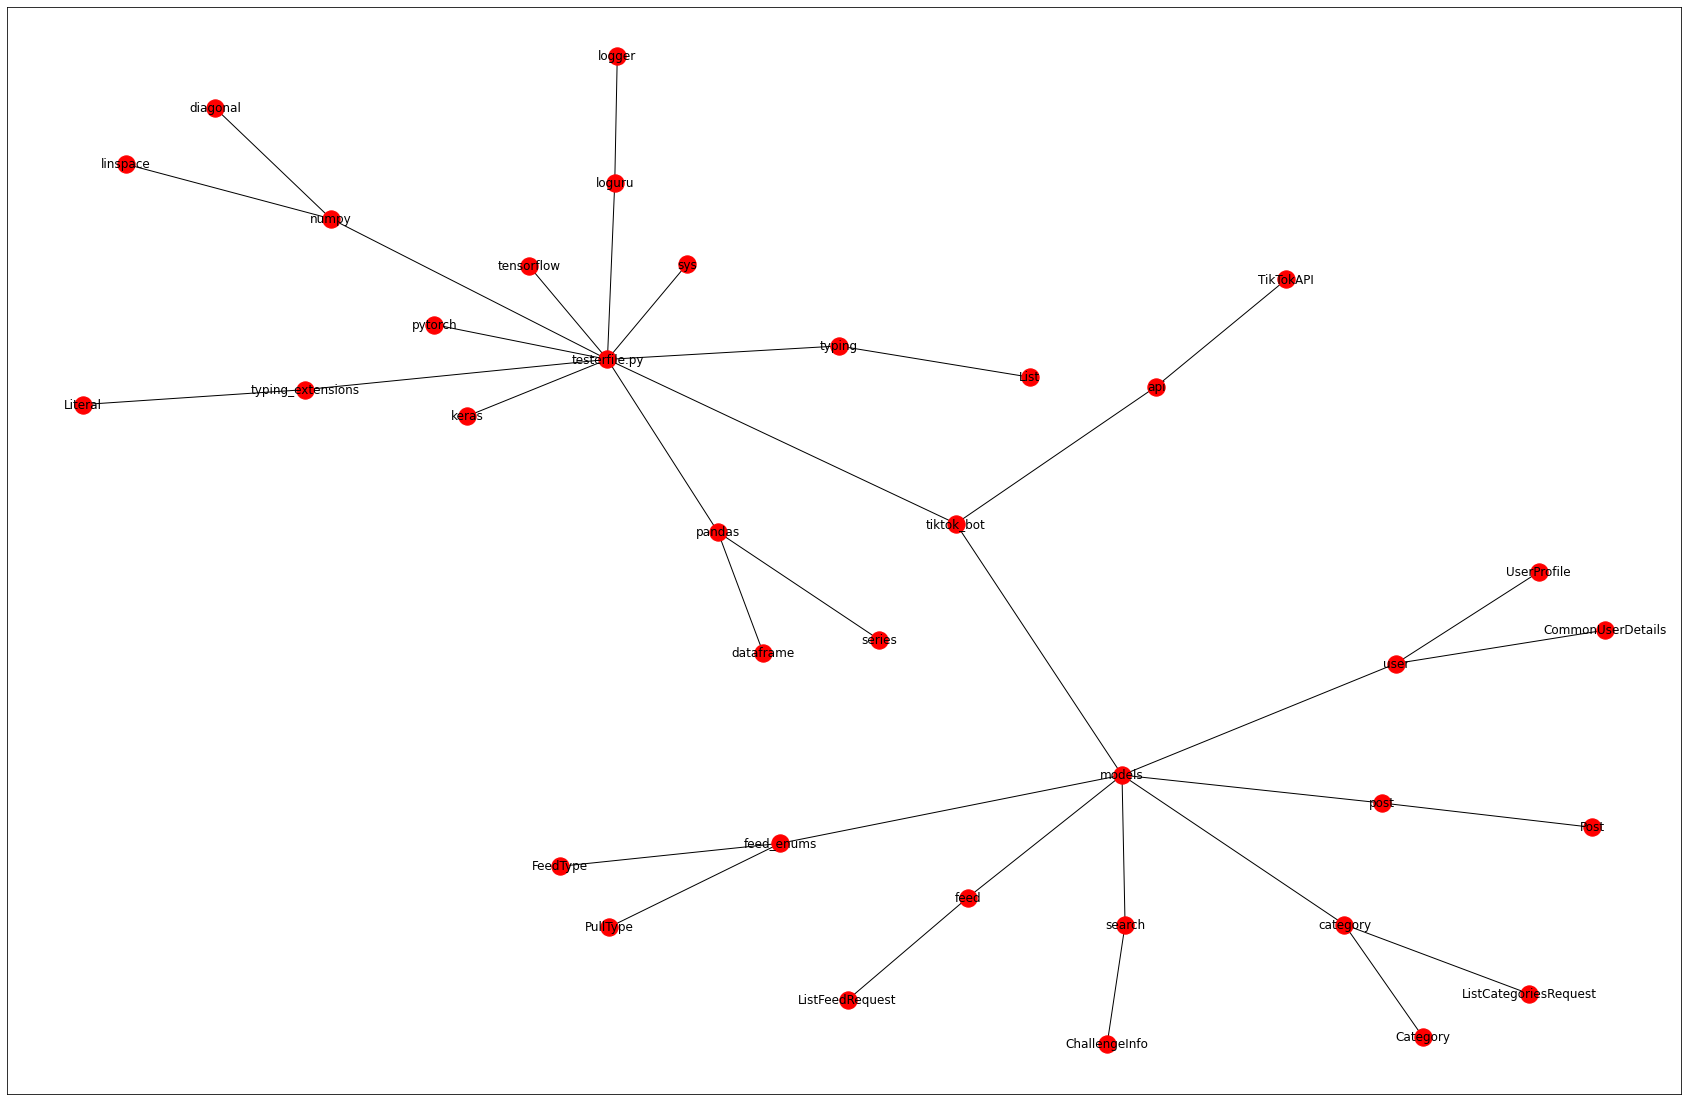

In [14]:
nx.draw_networkx(G, with_labels=True, node_color='r', font_color='k');

In [15]:
G.nodes()

NodeView(('testerfile.py', 'sys', 'typing', 'List', 'numpy', 'linspace', 'diagonal', 'pandas', 'dataframe', 'series', 'tensorflow', 'pytorch', 'keras', 'loguru', 'logger', 'typing_extensions', 'Literal', 'tiktok_bot', 'api', 'TikTokAPI', 'models', 'category', 'Category', 'ListCategoriesRequest', 'feed', 'ListFeedRequest', 'feed_enums', 'FeedType', 'PullType', 'post', 'Post', 'search', 'ChallengeInfo', 'user', 'CommonUserDetails', 'UserProfile'))

In [16]:
G.edges()

EdgeView([('testerfile.py', 'sys'), ('testerfile.py', 'typing'), ('testerfile.py', 'numpy'), ('testerfile.py', 'pandas'), ('testerfile.py', 'tensorflow'), ('testerfile.py', 'pytorch'), ('testerfile.py', 'keras'), ('testerfile.py', 'loguru'), ('testerfile.py', 'typing_extensions'), ('testerfile.py', 'tiktok_bot'), ('typing', 'List'), ('numpy', 'linspace'), ('numpy', 'diagonal'), ('pandas', 'dataframe'), ('pandas', 'series'), ('loguru', 'logger'), ('typing_extensions', 'Literal'), ('tiktok_bot', 'api'), ('tiktok_bot', 'models'), ('api', 'TikTokAPI'), ('models', 'category'), ('models', 'feed'), ('models', 'feed_enums'), ('models', 'post'), ('models', 'search'), ('models', 'user'), ('category', 'Category'), ('category', 'ListCategoriesRequest'), ('feed', 'ListFeedRequest'), ('feed_enums', 'FeedType'), ('feed_enums', 'PullType'), ('post', 'Post'), ('search', 'ChallengeInfo'), ('user', 'CommonUserDetails'), ('user', 'UserProfile')])

In [1]:
# From here below is a test with regards to files

In [11]:
# thank you to https://mkyong.com/python/python-how-to-list-all-files-in-a-directory/
# below for the code

In [2]:
import os

In [3]:
path = 'catalyst-master'

In [7]:
files = []

In [8]:
# r = root, d = directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if('.py' in file):
            files.append(os.path.join(r, file))

In [9]:
files

['catalyst-master/setup.py',
 'catalyst-master/versioneer.py',
 'catalyst-master/etc/conda_build_matrix.py',
 'catalyst-master/etc/gen_type_stubs.py',
 'catalyst-master/ci/make_conda_packages.py',
 'catalyst-master/tests/test_execution_styles.py',
 'catalyst-master/tests/test_testing.py',
 'catalyst-master/tests/test_panel_bar_reader.py',
 'catalyst-master/tests/test_fetcher.py',
 'catalyst-master/tests/test_examples.py',
 'catalyst-master/tests/test_memoize.py',
 'catalyst-master/tests/__init__.py',
 'catalyst-master/tests/test_bar_data.py',
 'catalyst-master/tests/test_tradesimulation.py',
 'catalyst-master/tests/test_security_list.py',
 'catalyst-master/tests/test_exception_handling.py',
 'catalyst-master/tests/test_benchmark.py',
 'catalyst-master/tests/test_data_portal.py',
 'catalyst-master/tests/test_finance.py',
 'catalyst-master/tests/test_continuous_futures.py',
 'catalyst-master/tests/test_api_shim.py',
 'catalyst-master/tests/test_clock.py',
 'catalyst-master/tests/test_lab

In [10]:
len(files)

381

In [ ]:
# So far it looks like we are doing well with regards to getting the 